# House Pricing Prediction
## Amoghvarsh Kulkarni

## Import Libraries

### References

### https://pandas.pydata.org/
### https://numpy.org/
### https://matplotlib.org/
### https://seaborn.pydata.org/
### https://docs.python.org/3/library/warnings.html
### https://plotly.com/python/graph-objects/
### https://plotly.com/python/plotly-express/
### https://docs.scipy.org/doc/scipy/reference/stats.html
### https://www.tensorflow.org/
### https://github.com/tensorflow/decision-forests
### https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
### https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
### https://scikit-learn.org/stable/modules/preprocessing.html
### https://scikit-learn.org/stable/modules/classes.html
### https://scikit-learn.org/stable/modules/ensemble.html
### https://xgboost.readthedocs.io/en/latest/
### https://scikit-learn.org/stable/modules/model_evaluation.html
### https://scikit-learn.org/stable/modules/classes.html
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.
### https://xgboost.readthedocs.io/en/latest/
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble
### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html





In [ ]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization
import warnings  # Handling warnings
warnings.simplefilter('ignore')
import plotly.graph_objects as go  # Interactive plotting
import plotly.express as px  # High-level interactive plotting
import scipy.stats as stats  # Statistical functions

# For TensorFlow Decision Forests
import tensorflow as tf  # TensorFlow for deep learning
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf  # TensorFlow Decision Forests

# For sklearn model training
from sklearn.compose import ColumnTransformer  # Preprocessing transformers
from sklearn.pipeline import Pipeline  # Constructing pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Data scaling and encoding
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score  # Model selection and evaluation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from xgboost import XGBRegressor  # XGBoost model
from sklearn.metrics import mean_squared_error  # Error metrics
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone  # Base classes for building custom models

## Load Data

In [ ]:
# Load the training and testing data
train_df= pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Display first and last 20 rows of the training data to understand its structure
train_df.head(20)
train_df.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


## Data Exploration

### Examined the shapes of the training and testing datasets, gaining an understanding of their sizes collectively.

### Following this, we categorized columns into numerical and categorical types, excluding the target 'SalePrice', enhancing our ability to collaboratively explore and analyze the data.

In [ ]:
# Display shapes of the datasets
print("Shape of Training Data:", train_df.shape)
print("Shape of Testing Data:", test_df.shape)

# Display summary statistics of the training data
train_df.describe()

# Identify target column and feature columns
target = 'SalePrice'
cat_features = train_df.select_dtypes(include=[object]).columns.to_list()  # Categorical columns
num_features = train_df.columns.to_list()  # List of all columns

# Remove categorical and target columns from numerical columns list
for cat in cat_features:
    num_features.remove(cat)
num_features.remove(target)

print('Categorical Features:', cat_features)
print('Numerical Features:', num_features)

Shape of Training Data: (1460, 81)
Shape of Testing Data: (1459, 80)
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Kitchen

## Data Preprocessing

### The training and testing datasets were combined to handle missing values uniformly across both.
### Various strategies were employed to impute missing data, including filling with 'None', zeros, or the most frequent values, and adjusting specific values based on group medians.
### Finally, the preprocessed data was split back into separate training and testing sets

In [ ]:
# Combine train and test data for handling missing values
num_train = train_df.shape[0]
num_test = test_df.shape[0]
target_values = train_df[target].values

full_data = pd.concat((train_df, test_df)).reset_index(drop=True)
full_data.drop([target], axis=1, inplace=True)
print("Combined data size:", full_data.shape)
print("Target values shape:", target_values.shape)

# Calculate and display the percentage of missing values in each column
null_counts = full_data.isna().sum()
null_percentage = (full_data.isnull().sum() / len(full_data)) * 100
null_percentage = null_percentage.drop(null_percentage[null_percentage == 0].index).sort_values(ascending=False)
for colName in null_percentage.index:
    print(colName + ": " + str(full_data[colName].isna().sum()))

# Define columns to fill with specific values or strategies
fill_none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
fill_zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'LotFrontage']
fill_mode_cols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
drop_cols = ['Utilities']

# Define helper functions to fill missing values
def fill_with_value(data, column_names, value="None"):
    for column_name in column_names:
        print(data[column_name].value_counts())
        data[column_name] = data[column_name].fillna(value)
    return data

def fill_with_zero(data, column_names):
    for column_name in column_names:
        print(data[column_name].value_counts())
        data[column_name] = data[column_name].fillna(0)
    return data

def fill_with_mode(data, column_names):
    for column_name in column_names:
        print(data[column_name].value_counts())
        data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
    return data

def drop_columns(data, column_names):
    for column_name in column_names:
        print(data[column_name].value_counts())
    return data.drop(column_names, axis=1)

# Apply the filling functions to the data
full_data = fill_with_value(full_data, fill_none_cols)
full_data = fill_with_value(full_data, ['Functional'], "Typ")
full_data["LotFrontage"] = full_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
full_data = fill_with_zero(full_data, fill_zero_cols)
full_data = fill_with_mode(full_data, fill_mode_cols)
full_data = drop_columns(full_data, drop_cols)

print(full_data)

# Separate the data back into train and test sets
combined_data = full_data
train_data = combined_data[:num_train]
test_data = combined_data[num_train:]
train_data.shape

Combined data size: (2919, 80)
Target values shape: (1460,)
PoolQC: 2909
MiscFeature: 2814
Alley: 2721
Fence: 2348
MasVnrType: 1766
FireplaceQu: 1420
LotFrontage: 486
GarageFinish: 159
GarageQual: 159
GarageCond: 159
GarageYrBlt: 159
GarageType: 157
BsmtExposure: 82
BsmtCond: 82
BsmtQual: 81
BsmtFinType2: 80
BsmtFinType1: 79
MasVnrArea: 23
MSZoning: 4
BsmtFullBath: 2
BsmtHalfBath: 2
Functional: 2
Utilities: 2
GarageArea: 1
GarageCars: 1
Electrical: 1
KitchenQual: 1
TotalBsmtSF: 1
BsmtUnfSF: 1
BsmtFinSF2: 1
BsmtFinSF1: 1
Exterior2nd: 1
Exterior1st: 1
SaleType: 1
PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
Alley
Grvl    120
Pave     78
Name: count, dtype: int64
Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basmen

(1460, 79)

## Exploratory Data Analysis

### Data Correlation


#### Heatmap 1: The heatmap displayed the correlation between various housing-related numerical features, with darker shades indicating stronger positive correlations. Strong relationships between garage and construction years, as well as between various living areas and room counts was observed.

#### Heatmap 2: Heatmap visualized the correlation coefficients between 'SalePrice' and selected features in a housing dataset. It highlights strong correlations particularly with 'OverallQual', 'GrLivArea', and 'GarageCars', indicating these features have a significant impact on house pricing.


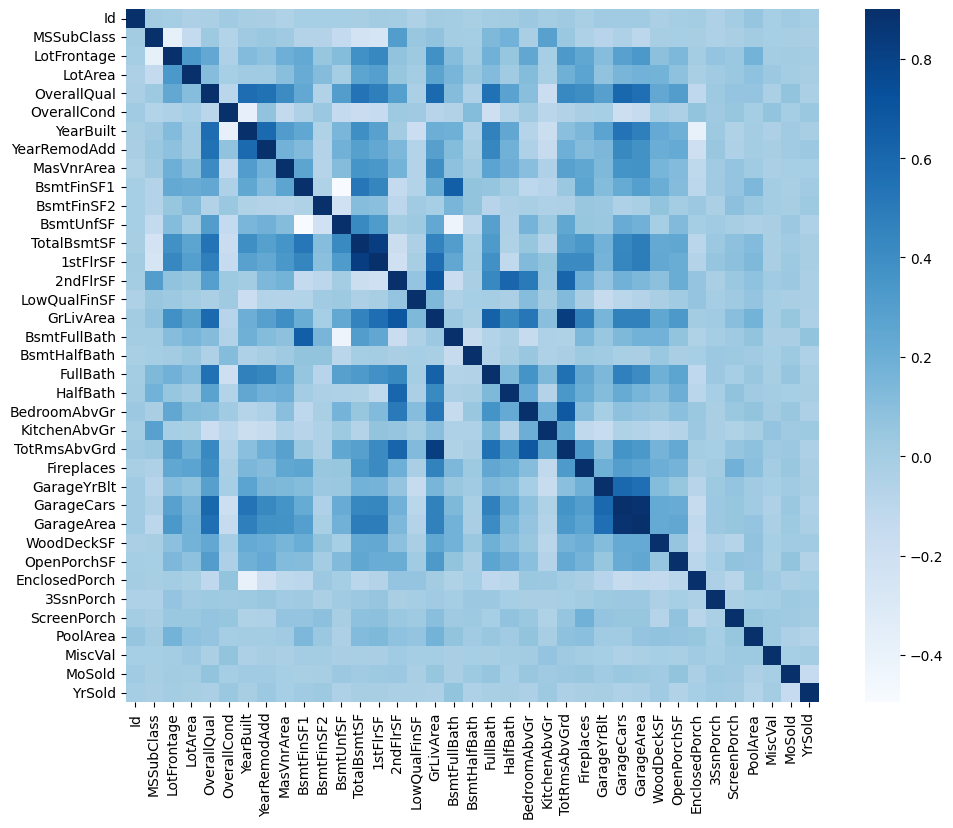

In [ ]:
# Add 'SalePrice' back to the training data
train_data['SalePrice'] = target_values

# Calculate the correlation matrix for numerical columns
corr_matrix = train_data[num_features].corr()

# Create the heatmap with a blue color palette
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap='Blues')
plt.show()



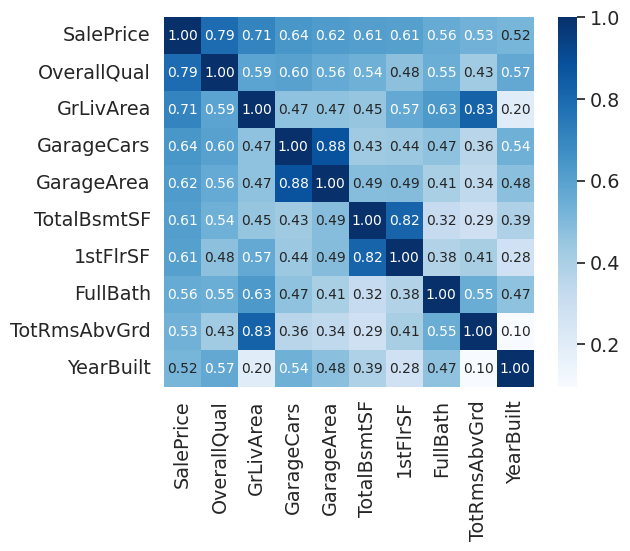

In [ ]:
# Select only the numeric columns
num_cols = train_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Select the top k variables most correlated with SalePrice
k = 10  # number of variables for heatmap
top_features = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(num_cols[top_features].values.T)

# Set the font scale for better readability
sns.set(font_scale=1.25)

# Create a heatmap with a blue color palette
heatmap = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                      yticklabels=top_features.values, xticklabels=top_features.values, cmap='Blues')
plt.show()

### Fit to Normal Distribution


### Used a helper function called fit_normal_distribution to analyze the distribution of data.

### It fitted the data to a normal distribution, calculated mean and standard deviation, and generated visualizations like histograms and Q-Q plots to assess normality.

In [ ]:
# Helper function to fit data to a normal distribution and create plots
def fit_normal_distribution(data, target):
    mean, sd = stats.norm.fit(data[target])
    hist_data = go.Histogram(x=data[target], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='red'))
    x_norm = np.linspace(data[target].min(), data[target].max(), 100)
    y_norm = stats.norm.pdf(x_norm, mean, sd)
    norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ = {mean:.2f}, σ = {sd:.2f})", line=dict(color="blue"))
    fig = go.Figure(data=[hist_data, norm_data])
    fig.update_layout(
        title=target + " Distribution",
        xaxis_title=target,
        yaxis_title="Density",
        legend_title_text="Fitted Normal Distribution",
        plot_bgcolor='rgba(32, 32, 32, 1)',
        paper_bgcolor='rgba(32, 32, 32, 1)',
        font=dict(color='white')
    )
    qq_data = stats.probplot(data[target], dist="norm")
    qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["red"])
    qq_fig.update_layout(
        title="Q-Q plot",
        plot_bgcolor='rgba(32, 32, 32, 1)',
        paper_bgcolor='rgba(32, 32, 32, 1)',
        font=dict(color='white')
    )
    slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
    line_x = np.array(qq_data[0][0])
    line_y = intercept + slope * line_x
    line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="blue"))
    qq_fig.add_trace(line_data)
    fig.show()
    qq_fig.show()

### Log-Transformation


#### The distribution of 'SalePrice' and its fit to a normal distribution. The histogram with the overlaid normal curve suggests a slight deviation from normality, while the Q-Q plot indicates that the data's tails are heavier than expected under a perfect normal distribution, as seen from the points deviating from the line at both ends.

In [ ]:
# Apply log transformation to reduce skewness of SalePrice
train_data[target] = np.log(train_data[target])

# Check the distribution again after log transformation
fit_normal_distribution(train_data, target)

### Scatter Plots with Trend Lines

#### Defined a function for scatter_with_trend to create scatter plots with Ordinary Least Squares (OLS) trend lines for specified variables against 'SalePrice', customizing the visual theme to dark mode.

#### It then generated subplots for six key housing features, applying the scatter function to each, resulting in a comprehensive visualization of relationships with 'SalePrice' displayed on a multi-panel plot.

In [ ]:
# Define the scatter plot function with a trend line
def scatter_with_trend(data, x, y, title):
    fig = px.scatter(data, x=x, y=y, title=title, trendline="ols")
    fig.update_layout(
        plot_bgcolor='rgba(32, 32, 32, 1)',
        paper_bgcolor='rgba(32, 32, 32, 1)',
        font=dict(color='white'),
        title=dict(font=dict(color='white'))
    )
    fig.update_xaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
    fig.update_yaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
    return fig

# Define important features
key_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Create subplots
from plotly.subplots import make_subplots
rows = int(np.ceil(len(key_features) / 3))
fig = make_subplots(rows=rows, cols=3, subplot_titles=[f'Log SalePrice vs {feature}' for feature in key_features])

# Add scatter plots with trend lines to subplots
for i, feature in enumerate(key_features):
    row = i // 3 + 1
    col = i % 3 + 1
    scatter_fig = scatter_with_trend(train_data, x=feature, y='SalePrice', title=f'Log SalePrice vs {feature}')
    for trace in scatter_fig['data']:
        fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(
    showlegend=False,
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

fig.show()

### Box Plots


###  The plot revealed significant price variability and outliers at the upper quality levels, indicating a diverse range of factors influencing the highest-priced homes.

In [ ]:
# Define the box plot function
def box_plot(data, x, y, title):
    fig = px.box(data, x=x, y=y, points="all", title=title)
    fig.update_layout(
        plot_bgcolor='rgba(32, 32, 32, 1)',
        paper_bgcolor='rgba(32, 32, 32, 1)',
        font=dict(color='white'),
        title=dict(font=dict(color='white'))
    )
    fig.update_xaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
    fig.update_yaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
    fig.show()

# Create a box plot of SalePrice vs OverallQual
box_plot(train_data, x='OverallQual', y='SalePrice', title='Box Plot of Sale Price vs Overall Quality')

## Data Preprocessing

### Handled data preprocessing by separating features and the target variable from the training dataset.

### Defined transformers for standardizing numerical features and one-hot encoding categorical features, which were then applied using a ColumnTransformer.

### The preprocessed data was then split into training and testing sets, ready for model training and evaluation.






In [ ]:
inputs = train_data.drop(columns=[target])  # Exclude the target column from features
target_values = train_data[target]  # Define the target variable

# Define transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # One-hot encode categorical features
])

# Update categorical and numerical columns
cat_features = inputs.select_dtypes(include=['object', 'category']).columns
num_features = inputs.select_dtypes(include=['int64', 'float64']).columns

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ], remainder='passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the input data
processed_inputs = pipeline.fit_transform(inputs)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(processed_inputs, target_values, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((1022, 301), (438, 301))

## Individual Model Training and Hyperparameter Tuning

### Iteratively trained and optimized three regressor models: RandomForest, XGBoost, and GradientBoosting.

### The RandomForest model was trained with 81 fits, resulting in a best score of 32919.578 and optimal parameters: max_depth=None, min_samples_split=2, and n_estimators=500. XGBoost achieved a best score of 30159.722 with parameters learning_rate=0.1, max_depth=3, and n_estimators=500. GradientBoosting yielded the best performance, scoring 28791.743 with parameters learning_rate=0.1, max_depth=5, and n_estimators=500. These findings indicate GradientBoosting as the top-performing model for predicting house prices.

In [ ]:
# Define models and hyperparameter grids
regressors = {
    'RandomForest': RandomForestRegressor(random_state=42),  # Random Forest model
    'XGBoost': XGBRegressor(random_state=42),  # XGBoost model
    'GradientBoosting': GradientBoostingRegressor(random_state=5)  # Gradient Boosting model
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 4, 5],
    }
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)  # KFold cross-validation

# Train models
model_grids = {}
for model_name, model in regressors.items():
    print(f'Training and tuning {model_name}')
    model_grids[model_name] = GridSearchCV(model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    model_grids[model_name].fit(x_train, y_train)
    best_params = model_grids[model_name].best_params_
    best_score = np.sqrt(-1 * model_grids[model_name].best_score_)
    print(f'Best parameters of {model_name}: {best_params}')
    print(f'Best score of {model_name}: {best_score}')

Training and tuning RandomForest
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters of RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best score of RandomForest: 0.15373011855241905
Training and tuning XGBoost
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters of XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best score of XGBoost: 0.13759806991988735
Training and tuning GradientBoosting
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters of GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best score of GradientBoosting: 0.13737925954454386


## Model Evaluation

### After training, the models are evaluated on the test set using a function to compute the log-transformed root mean squared error (RMSE).

### Among the models, GradientBoosting & XGBoost exhibited the best performance with an RMSE of approximately 0.131, showcasing its effectiveness in predicting house

In [ ]:
# Define log-transformed RMSE calculation
def log_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# Evaluate models on test set
for model_name in model_grids.keys():
    y_pred = model_grids[model_name].predict(x_test)
    print(model_name + ': ' + str(log_rmse(y_test, y_pred)))

RandomForest: 0.010823981295149792
XGBoost: 0.010165693184222021
GradientBoosting: 0.010033067105535889


## Gradient Boosting Cross Validation Score

### The code defined a function rmsle_cv to compute the root mean squared error (RMSE) using cross-validation for a Gradient Boosting Regressor model.

### The model was instantiated with specified hyperparameters and trained using cross-validation. The output displayed the average RMSE score across the folds, which was approximately 28943.0364, indicating the model's performance in predicting house prices.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define cross-validation function for RMSE
n_folds = 5  # Number of folds for cross-validation

def rmsle_cv(model):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# Train Gradient Boosting Regressor with cross-validation
grad_boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10,
                                       loss='huber', random_state=5)
score = rmsle_cv(grad_boost)
print("Gradient Boosting score: {:.4f} \n".format(score.mean()))


Gradient Boosting score: 0.1259 



## XGBoost

### The XGBoost Regressor model was trained with cross-validation using predefined hyperparameters.

### The output presented the average RMSE score across the folds, which was approximately 30828.1720, indicating the model's performance in predicting house prices.

In [ ]:
# Train XGBoost Regressor with cross-validation
xgb_model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                         learning_rate=0.05, max_depth=3,
                         min_child_weight=1.7817, n_estimators=2200,
                         reg_alpha=0.4640, reg_lambda=0.8571,
                         subsample=0.5213, silent=1,
                         random_state=7, nthread=-1)
score = rmsle_cv(xgb_model)
print("Xgboost score: {:.4f} \n".format(score.mean()))

## TensorFlow Decision Forests Model

### The TensorFlow Decision Forests Random Forest model was trained and evaluated using the provided dataset.

### The training set was split into training and testing sets, and the model was trained on the training data. After training, the model's structure was visualized, showing the number of trees and their respective RMSE values.

### Additionally, the model was evaluated on the test set, yielding a log-RMSE score on the test data of approximately 0.2008. Finally, the variable importances were plotted based on the number of attributes as roots in the decision trees.

In [ ]:
# Helper function to split dataset into training and testing sets
def split_data(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_tf, valid_tf = split_data(train_data)
train_tf = train_tf.drop(['Id'], axis = 1)
valid_tf = valid_tf.drop(['Id'], axis = 1)
print("{} examples in training, {} examples in testing.".format(len(train_tf), len(valid_tf)))

# Define label column
label_col = 'SalePrice'

# Convert pandas DataFrames to TensorFlow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_tf, label=label_col, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_tf, label=label_col, task=tfdf.keras.Task.REGRESSION)

# Train TensorFlow Decision Forests Random Forest Model
tfdf.keras.get_all_models()
tfdf_rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
tfdf_rf.compile(metrics=["mse"])

In [ ]:
# Train the model
tfdf_rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:06.831215. Found 987 examples.
Training model...
Model trained in 0:00:04.729020
Compiling model...
Model compiled.


In [ ]:
# Plot model structure
tfdf.model_plotter.plot_model_in_colab(tfdf_rf, tree_idx=0, max_depth=5)

In [ ]:
# Evaluate the model
training_logs = tfdf_rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in training_logs], [log.evaluation.rmse for log in training_logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
# Evaluate the model on the test set
predictions_valid = tfdf_rf.predict(valid_ds)
print("TFDF Random Forest Log-RMSE on test data:", log_rmse(valid_tf[label_col].values, predictions_valid))

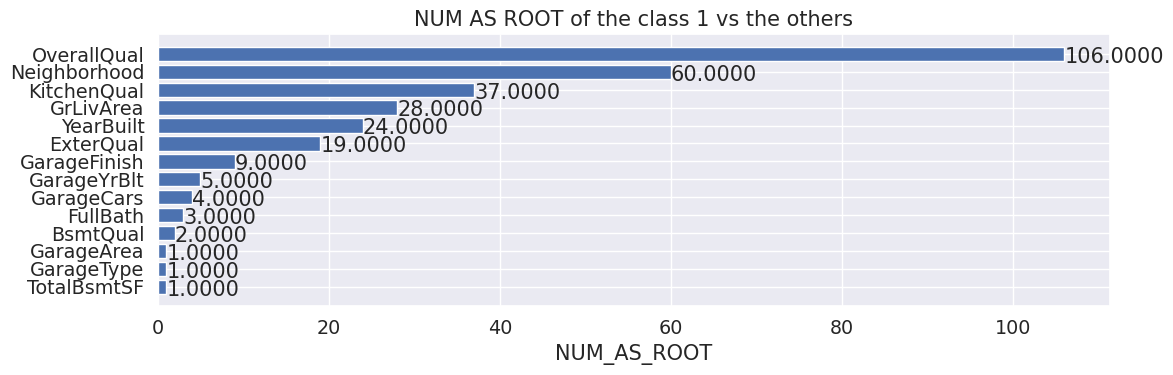

In [ ]:
# Plot variable importances from the inspector
inspector = tfdf_rf.make_inspector()
plt.figure(figsize=(12, 4))

var_importance_metric = "NUM_AS_ROOT"
var_importances = inspector.variable_importances()[var_importance_metric]

feat_names = [vi[0].name for vi in var_importances]
feat_importances = [vi[1] for vi in var_importances]
feat_ranks = range(len(feat_names))

bars = plt.barh(feat_ranks, feat_importances, label=[str(x) for x in feat_ranks])
plt.yticks(feat_ranks, feat_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feat_importances, bars.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(var_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

##Submission


### Loaded the test data, making predictions on the test set, and saving the results to a CSV file named "sample.csv".








In [ ]:
# Load Test Data
import math
import pandas as pd
from sklearn.pipeline import Pipeline
test_data = pd.read_csv('/content/test.csv')

ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task=tfdf.keras.Task.REGRESSION)
preds = tfdf_rf.predict(test_ds)

# # Create Output DataFrame
output = pd.DataFrame({'Id': ids, 'SalePrice': [math.exp(val) for val in preds.squeeze()]})
output

2/2 [==============================] - 1s 31ms/step


,Id,SalePrice
0,1461,126335.756950
1,1462,157061.040384
2,1463,174192.102943
3,1464,186621.355394
4,1465,193251.952263
...,...,...
1454,2915,92003.213165
1455,2916,89847.965829
1456,2917,153080.875201
1457,2918,116724.088025


In [ ]:
output.to_csv('Predictions.csv',index=False)